In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import networkx as nx
import qutip as qt
import cirq
import pandas as pd
import seaborn as sns
import plot_lib
import seaborn as sns
plot_lib.update_settings(usetex=False)
%config InlineBackend.figure_format = 'svg'

In [3]:
noise_level_list = np.linspace(0,1,101)

In [ ]:
idx = 0
# Path
path = "../../data/max_cut_"+str(idx)+"/"
# Load graph
graph = nx.readwrite.gpickle.read_gpickle(path + "graph")
# Create object
obj = MyClass(graph)
# Create mixed state
rho_in = np.diag(obj.mixed_state())

# Create normalized square of rho
rho_sq_norm = rho_dm@rho_dm / np.trace(rho_dm@rho_dm)
rho_sq_norm = rho_sq_norm.astype('complex64')
    
"""Loop over different noise levels"""
approxr_depolarizing = []
for idx, noise_level in enumerate(noise_level_list):
    # create qubits
    qubits = cirq.LineQubit.range(len(graph.nodes))

    # init expval
    expval = 0 
    for u, v in graph.edges:
        zz = cirq.PauliString(cirq.Z(qubits[u])) * cirq.PauliString(cirq.Z(qubits[v]))
        expval_zz = zz.expectation_from_density_matrix(
            state=rho_sq_norm, 
            qubit_map={q: i for i, q in enumerate(qubits)}
        ).real
        expval += (1-noise_level)**2 * expval_zz

    mitigated_cost = - 1/2 * (expval - M)
    approxr_depolarizing.append(mitigated_cost / C_max)

101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101


/Users/turbotanten/Documents/GitHub/virtual-distillation/examples/plot_lib.py:116: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(w*scale, h*scale), **kwargs)


101
101
101
101
101
101
101
101
101
101


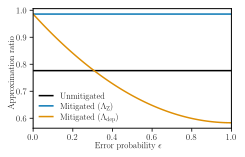

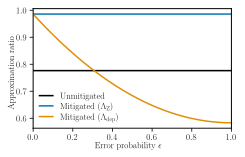

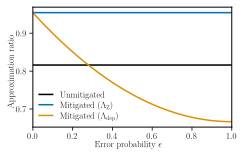

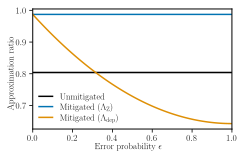

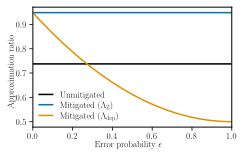

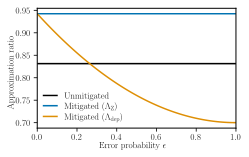

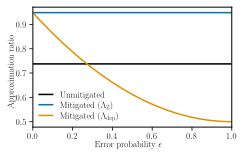

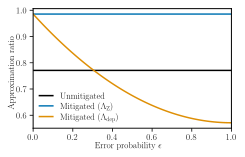

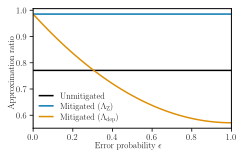

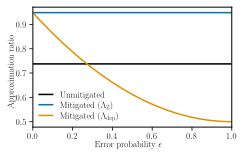

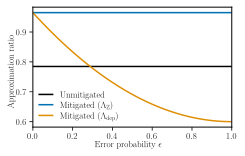

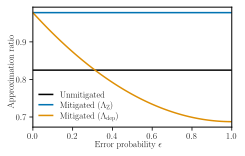

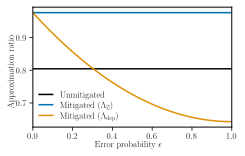

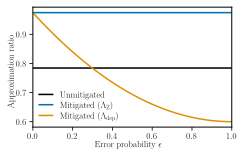

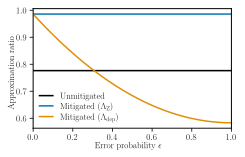

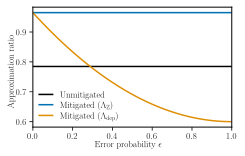

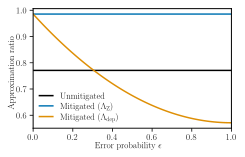

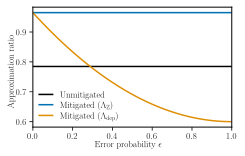

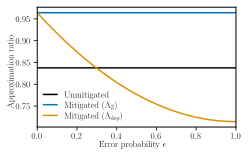

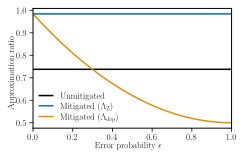

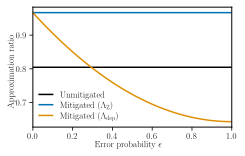

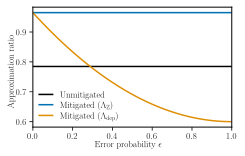

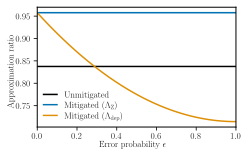

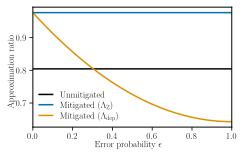

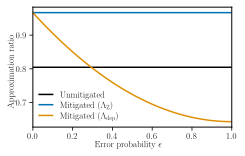

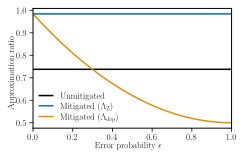

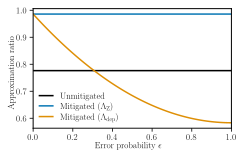

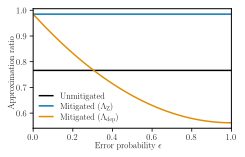

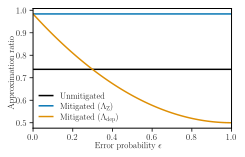

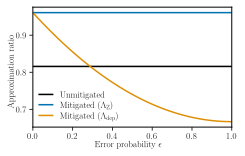

In [17]:
"""Calculate the cost at the output from QAOA"""
approxr = []

"""Calculate the mitigated cost"""
m_approxr_dephasing = []
m_approxr_depolarizing = []

noise_level_list = np.linspace(0,.5,101)
for i in range(30):
    # This is how you read files
    path = "maxcut/max_cut_"+str(i)+"/graph"
    # Graph
    graph = nx.readwrite.gpickle.read_gpickle(path)
    
    def product(*args, repeat=1):
        # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
        # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
        pools = [list(pool) for pool in args] * repeat
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield list(prod)
        
    # Number of edges
    M = len(graph.edges)
    # Number of nodes
    N = len(graph.nodes)
    # Adjacency matrix
    A = nx.adjacency_matrix(graph).todense()

    # Generate a list of all possible n‐tuples of elements from {1,-1} and
    # organize them as a (2^n x n) matrix. In other words create all possible
    # solutions to the problem.
    s = np.array(list(product([1, -1], repeat=N)))

    # Construct the the cost function for Max Cut: C = -1/2 Sum(Z_i*Z_j) + M/2
    C = - 1/2*(np.diag(s@np.triu(A)@s.T) - M)
    
    # Max cost
    C_max = max(C)
    
    # Find the args that corresponds to the maximum of the cost function
    args = np.where(C == C_max)
    
    # Create the ideal state
    rho_ideal = np.zeros(2**N)
    for arg in args[0]:
        rho_ideal[arg] = 1
    rho_ideal = rho_ideal / np.sum(rho_ideal) # normalize
    
    # Create a thermal state
    beta = 0.1 # temperature
    rho_thermal = np.exp(-beta*C)
    rho_thermal = rho_thermal / np.sum(rho_thermal) # normalize
    
    # Create a mixed state
    rho = 0.5*rho_ideal + 0.5*rho_thermal
    # Promote it to a matrix
    rho_dm = np.diag(rho)
    
    # Create normalized square of rho
    rho_sq_norm = rho_dm@rho_dm / np.trace(rho_dm@rho_dm)
    rho_sq_norm = rho_sq_norm.astype('complex64')
    
    """Loop over different noise levels"""
    approxr_depolarizing = []
    for idx, noise_level in enumerate(noise_level_list):
        # create qubits
        qubits = cirq.LineQubit.range(len(graph.nodes))

        # init expval
        expval = 0 
        for u, v in graph.edges:
            zz = cirq.PauliString(cirq.Z(qubits[u])) * cirq.PauliString(cirq.Z(qubits[v]))
            expval_zz = zz.expectation_from_density_matrix(
                state=rho_sq_norm, 
                qubit_map={q: i for i, q in enumerate(qubits)}
            ).real
            expval += (1-noise_level)**2 * expval_zz
        
        mitigated_cost = - 1/2 * (expval - M)
        approxr_depolarizing.append(mitigated_cost / C_max)

In [8]:
df = pd.DataFrame(np.array(m_approxr_depolarizing).T)

In [9]:
avg_approxr = np.mean(approxr)
m_avg_approxr = np.mean(m_approxr_dephasing)
m_avg_approxr_dep = df.mean(axis=1)

/Users/turbotanten/Documents/GitHub/virtual-distillation/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/turbotanten/Documents/GitHub/virtual-distillation/env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
